# Capstone Project - The Battle of the Neighborhoods
### Applied Data Science Capstone by IBM/Coursera

### Report

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)




## Introduction: Business Problem <a name="introduction"></a>

In this project we will try to find an optimal location for a restaurant. Specifically, this report will be targeted to stakeholders interested in opening an **Indian restaurant** in **Howard County, MD**, USA.

Since there are lots of restaurants in and around Howard County we will try to detect **locations that are not already crowded with restaurants**. We are also particularly interested in **areas with no Indian restaurants in vicinity**. We would also prefer locations **as close to county center as possible**, assuming that first two conditions are met.

We will use our data science powers to generate a few most promissing neighborhoods based on this criteria. Advantages of each area will then be clearly expressed so that best possible final location can be chosen by stakeholders.

## Data <a name="data"></a>

Based on definition of our problem, factors that will influence our decission are:
* number of existing restaurants in the neighborhood (any type of restaurant)
* number of and distance to Indian restaurants in the neighborhood, if any
* distance of neighborhood from county center

We decided to use regularly spaced grid of locations, centered around county center, to define our neighborhoods.

Following data sources will be needed to extract/generate the required information:
* centers of candidate areas will be generated algorithmically and approximate addresses of centers of those areas will be obtained using **Google Maps API reverse geocoding**
* number of restaurants and their type and location in every neighborhood will be obtained using **Foursquare API**
* coordinate of Howard County center will be obtained using **Google Maps API geocoding** of well known Howard County location (Columbia)

#### Howard County & Getting the center of Howard County

Let's create latitude & longitude coordinates for centroids of our candidate neighborhoods. We will create a grid of cells covering our area of interest which is aprox. 12x12 killometers centered around Howard County center.

Let's first find the latitude & longitude of Howard County center, using specific, well known address and Google Maps geocoding API.

#### Creating Neighborhood candidates

Now let's create a grid of area candidates, equaly spaced, centered around county center and within ~5 miles from MD-108, Ellicott City (Howard County Center). Our neighborhoods will be defined as circular areas with a radius of 300 meters, so our neighborhood centers will be 600 meters apart.

To accurately calculate distances we need to create our grid of locations in Cartesian 2D coordinate system which allows us to calculate distances in meters (not in latitude/longitude degrees). Then we'll project those coordinates back to latitude/longitude degrees to be shown on Folium map. So let's create functions to convert between WGS84 spherical coordinate system (latitude/longitude degrees) and UTM Cartesian coordinate system (X/Y coordinates in  meters).

Let's visualize the data we have so far: city center location and candidate neighborhood centers:

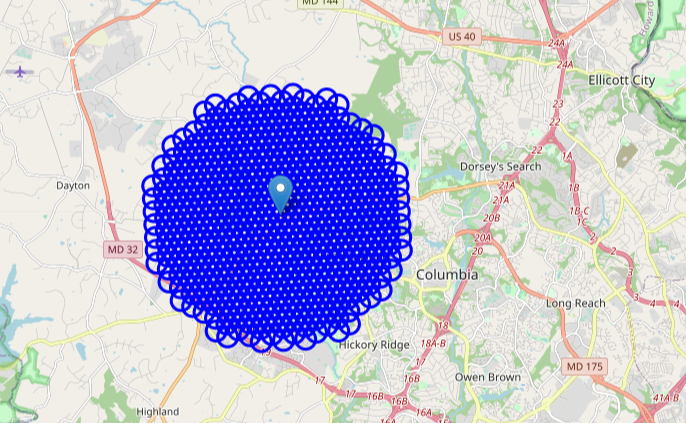

Sample of center locations of each of the neighborhood candidates are as listed below:

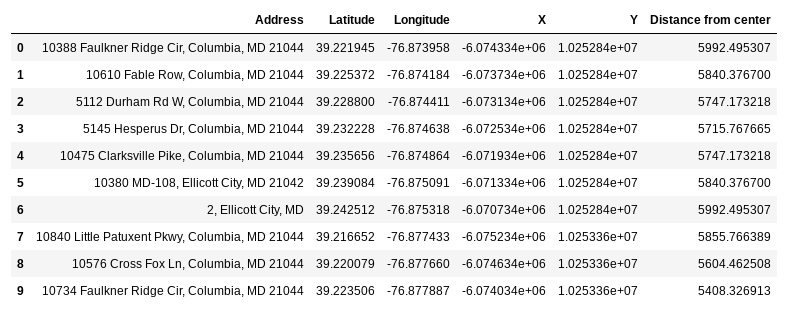

### Foursquare
Now that we have our location candidates, let's use Foursquare API to get info on restaurants in each neighborhood.

We're interested in venues in 'food' category, but only those that are proper restaurants - coffe shops, pizza places, bakeries etc. are not direct competitors so we don't care about those. So we will include in out list only venues that have 'restaurant' in category name, and we'll make sure to detect and include all the subcategories of specific 'Indian restaurant' category, as we need info on Indian restaurants in the neighborhood.

    Category IDs corresponding to Indian restaurants were taken from Foursquare web site (https://developer.foursquare.com/docs/resources/categories):

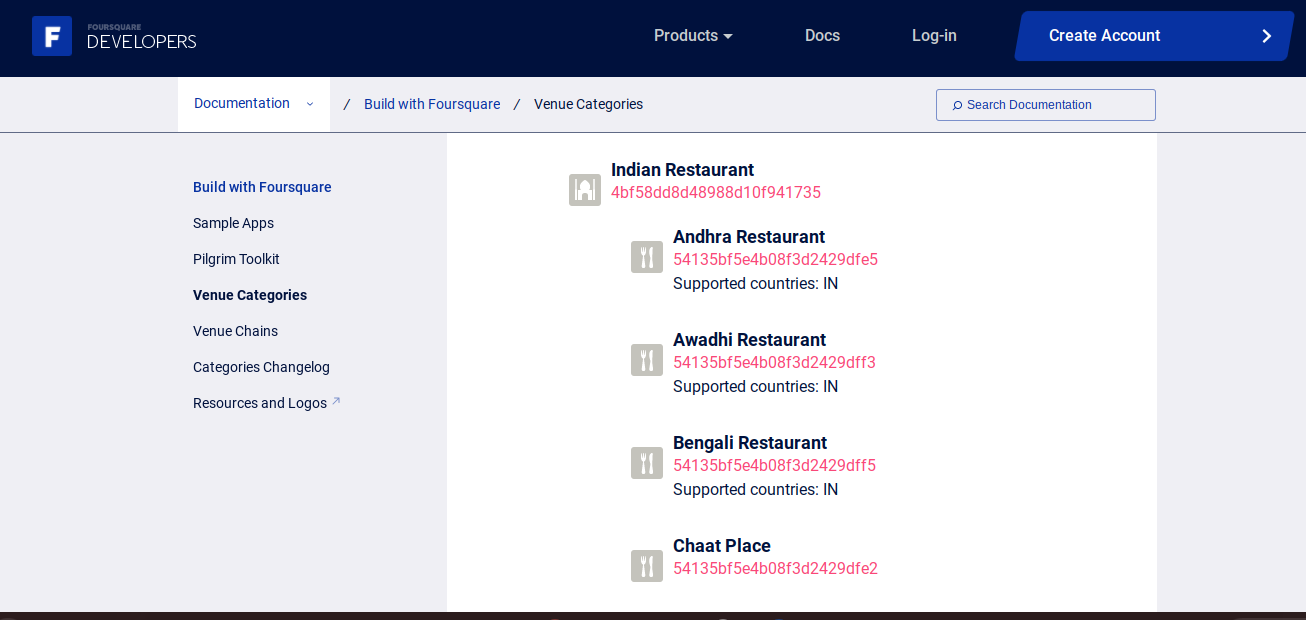

After getting the restaurant and the venue details, we get the following data:

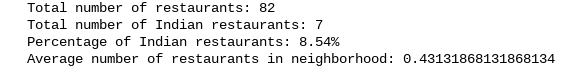

Let's now see all the collected restaurants in our area of interest on map, and let's also show Indian restaurants in different color.

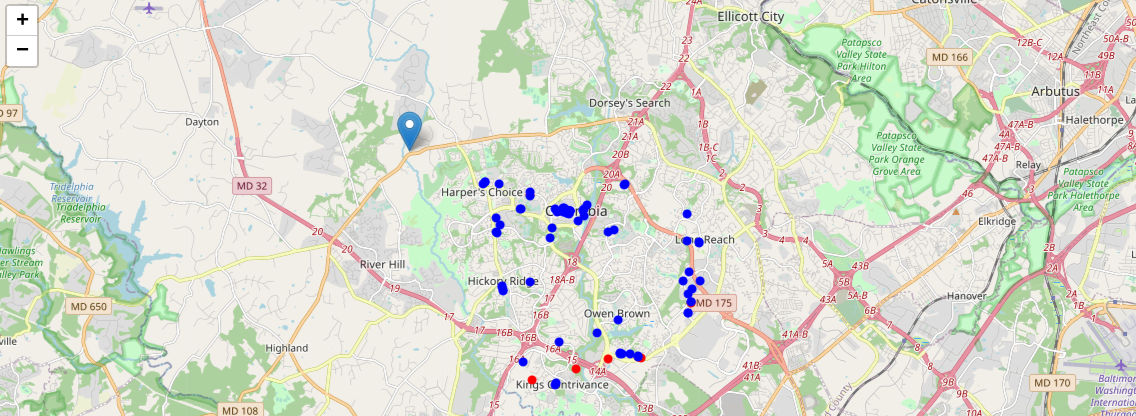

So now we have all the restaurants in area within few kilometers from Howard center, and we know which ones are Indian restaurants! We also know which restaurants exactly are in vicinity of every neighborhood candidate center.

This concludes the data gathering phase - we're now ready to use this data for analysis to produce the report on optimal locations for a new Indian restaurant!

## Methodology <a name="methodology"></a>

In this project we will direct our efforts on detecting areas of Howard County that have low restaurant density, particularly those with low number of Indian restaurants. We will limit our analysis to area ~6km around Howard county center.

In first step we have collected the required **data: location and type (category) of every restaurant within 6km from Howard County center** (Columbia). We have also **identified Indian restaurants** (according to Foursquare categorization).

Second step in our analysis will be calculation and exploration of '**restaurant density**' across different areas of Howard County - we will use **heatmaps** to identify a few promising areas close to center with low number of restaurants in general (*and* no Indian restaurants in vicinity) and focus our attention on those areas.

In third and final step we will focus on most promising areas and within those create **clusters of locations that meet some basic requirements** established in discussion with stakeholders: we will take into consideration locations with **no more than two restaurants in radius of 250 meters**, and we want locations **without Indian restaurants in radius of 400 meters**. We will present map of all such locations but also create clusters (using **k-means clustering**) of those locations to identify general zones / neighborhoods / addresses which should be a starting point for final 'street level' exploration and search for optimal venue location by stakeholders.

## Analysis <a name="analysis"></a>

Let's perform some basic explanatory data analysis and derive some additional info from our raw data. First let's count the **number of restaurants in every area candidate**:

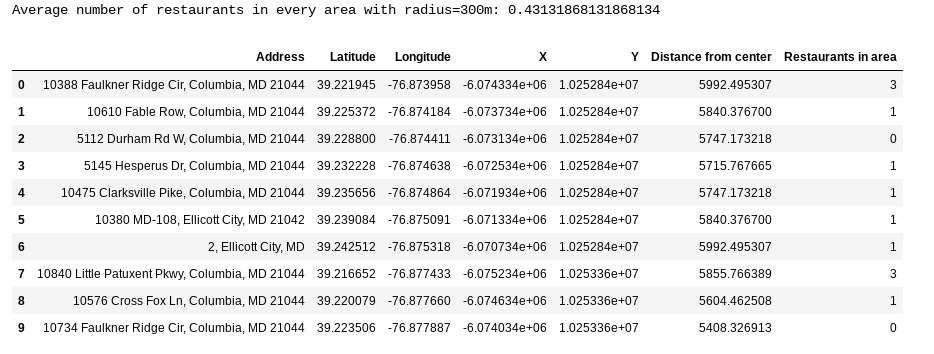

OK, now let's calculate the **distance to nearest Indian restaurant from every area candidate center** (not only those within 300m - we want distance to closest one, regardless of how much distant it is).

Let's crete a map showing **heatmap / density of restaurants** and try to extract some meaningfull info from that. 


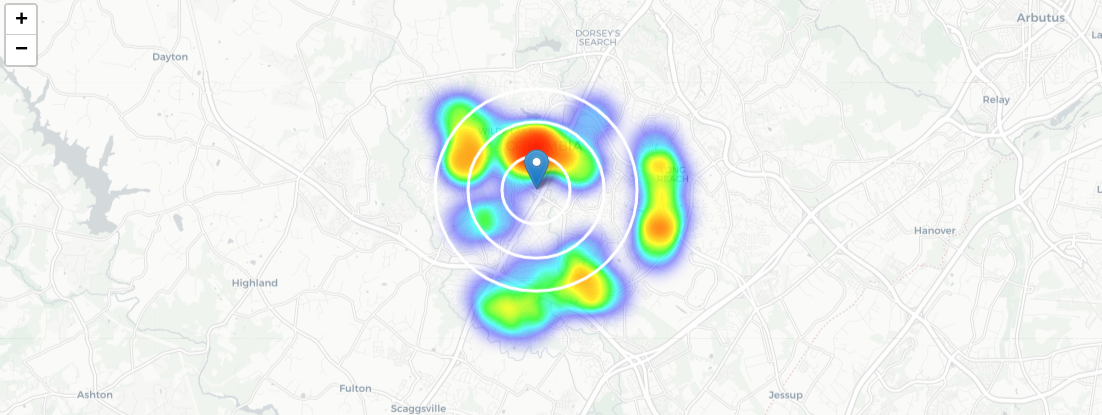

Looks like a few pockets of low restaurant density closest to city center can be found **south, south-west and east from Howard Center**. 

Let's create another heatmap map showing **heatmap/density of Indian restaurants** only.

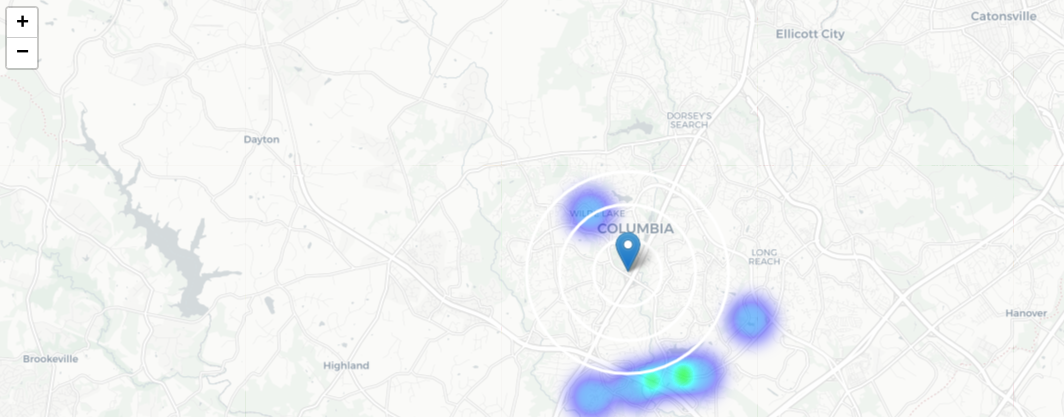

This map is not so 'hot' (Indian restaurants represent a subset of ~9% of all restaurants in Howard County) but it also indicates higher density of existing Indian restaurants towards south-east from Howard County center, with closest pockets of **Indian restaurant sparsely positioned west, south-west, north and north-east from howard center**.

Based on this we will now focus our analysis on areas *south-west, south, North-east and North from Howard center* - we will move the center of our area of interest and reduce it's size to have a radius of **2.5km**. This places our location candidates mostly in neighborhoods **Hickory Ridge and Oakland Mills** 

### Hickory Ridge and Oakland Mills

Let's define new, more narrow region of interest, which will include low-restaurant-count parts of Hickory Ridge and Oakland Mills closest to Howard Center.

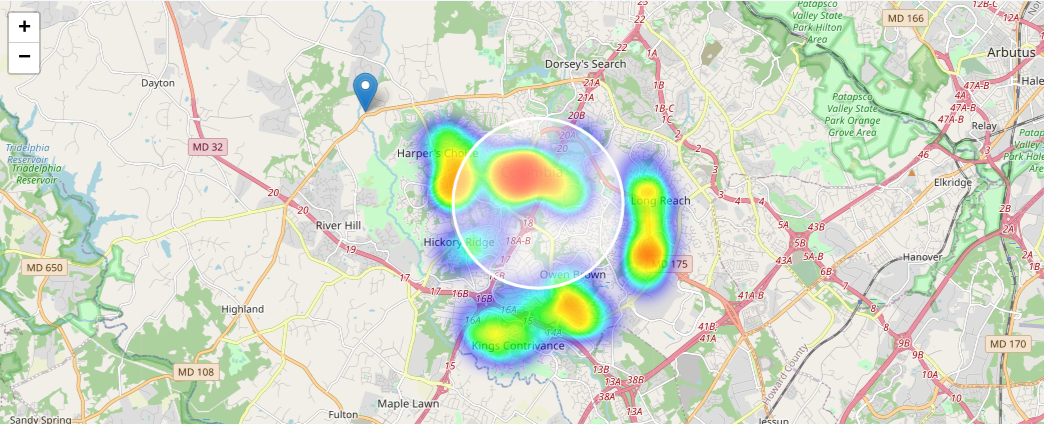

OK. Now let's calculate two most important things for each location candidate: **number of restaurants in vicinity** (we'll use radius of **1000 meters**) and **distance to closest Indian restaurant**.

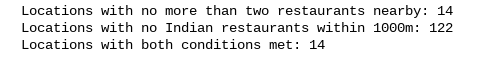

Let's see how this looks on a map.

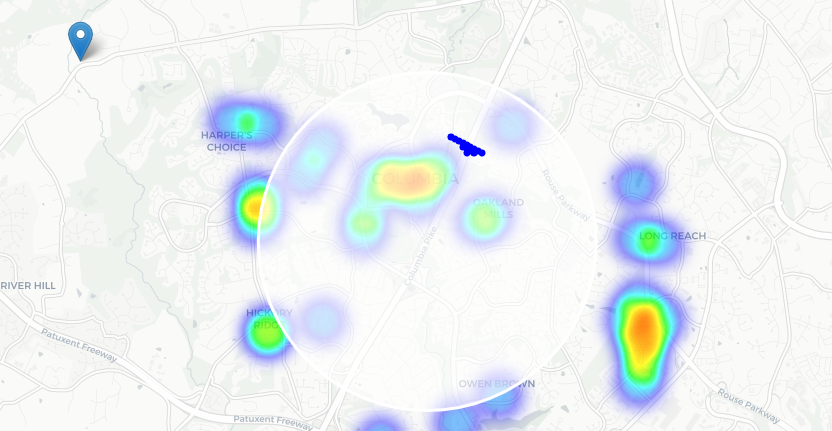

We now have a bunch of locations fairly close to Howard Center, and we know that each of those locations has no more than two restaurants in radius of 1000m, and no Indian restaurant closer than 1000m. Any of those locations is a potential candidate for a new Indian restaurant, at least based on nearby competition.

Let's now show those good locations in a form of heatmap:

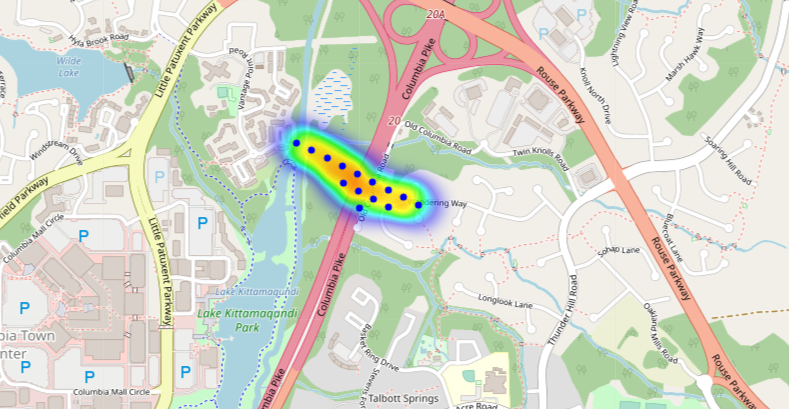

What we have now is a clear indication of zones with low number of restaurants in vicinity, and *no* Indian restaurants at all nearby.

Let us now **cluster** those locations to create **centers of zones containing good locations**. Those zones, their centers and addresses will be the final result of our analysis. 

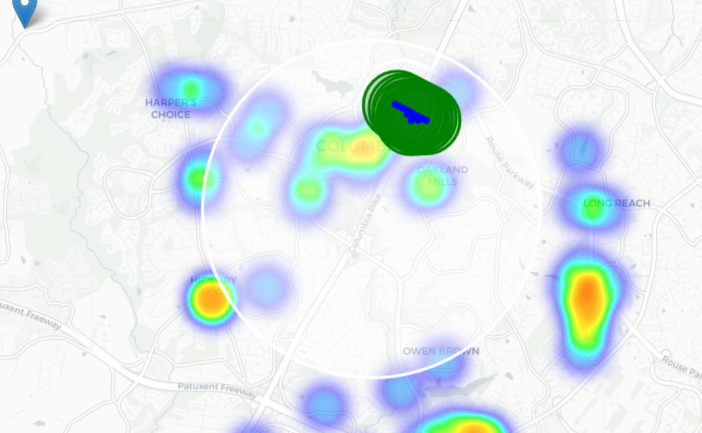

Not bad - our clusters represent groupings of most of the candidate locations and cluster centers are placed nicely in the middle of the zones 'rich' with location candidates.

Addresses of those cluster centers will be a good starting point for exploring the neighborhoods to find the best possible location based on neighborhood specifics.

Let's see those zones on a city map without heatmap, using shaded areas to indicate our clusters:

...and the candidate areas in **Oakland Mills**:

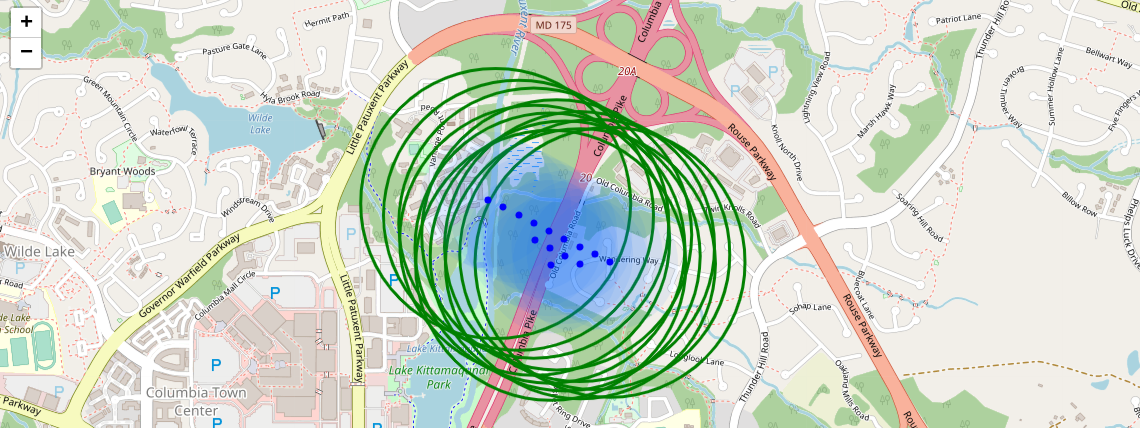

Finaly, let's **reverse geocode those candidate area centers to get the addresses** which can be presented to stakeholders.

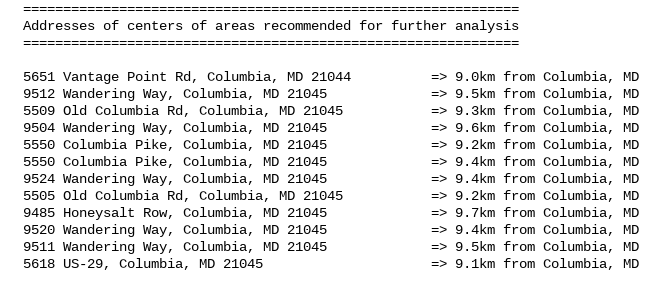

This concludes our analysis. We have created 12 addresses representing centers of zones containing locations with low number of restaurants and no Indian restaurants nearby, all zones being somewhat farther to city center (all about 9km from Howard Center. Although zones are shown on map with a radius of ~500 meters (green circles), their shape is actually very irregular and their centers/addresses should be considered only as a starting point for exploring area neighborhoods in search for potential restaurant locations. All of the zones are located in Oakland Mills, somewhat close to Howard County center.

## Results and Discussion <a name="results"></a>

Our analysis shows that there are not a great number of restaurants in Howard (82 in our area of interest which was 6x6km around Howard center). There are multiple pockets of low restaurant density across the Howard county. Highest concentration of restaurants was detected west and south-east from Howard Center, so we focused our attention to areas south-west and north, corresponding to neighborhoods Hickory ridge and  Oakland Mills. We continued with these 2 neighborhoods.

After directing our attention to this more narrow area of interest (covering approx. 5x5km south-west from Howard center) we first created a dense grid of location candidates (spaced 100m appart); those locations were then filtered so that those with more than two restaurants in radius of 1000m and those with an Indian restaurant closer than 1000m were removed.

Those location candidates were then clustered to create zones of interest which contain greatest number of location candidates. Addresses of centers of those zones were also generated using reverse geocoding to be used as markers/starting points for more detailed local analysis based on other factors.

Result of all this is 12 zones containing largest number of potential new restaurant locations based on number of and distance to existing venues - both restaurants in general and Indian restaurants particularly. This, of course, does not imply that those zones are actually optimal locations for a new restaurant! Purpose of this analysis was to only provide info on areas close to Howard center but not crowded with existing restaurants (particularly Indian) - it is entirely possible that there is a very good reason for small number of restaurants in any of those areas, reasons which would make them unsuitable for a new restaurant regardless of lack of competition in the area. Recommended zones should therefore be considered only as a starting point for more detailed analysis which could eventually result in location which has not only no nearby competition but also other factors taken into account and all other relevant conditions met.

## Conclusion <a name="conclusion"></a>

Purpose of this project was to identify areas near Howard County center with low number of restaurants (particularly Indian restaurants) in order to aid stakeholders in narrowing down the search for optimal location for a new Indian restaurant. By calculating restaurant density distribution from Foursquare data we have first identified general neighborhoods that justify further analysis (Hickory Ridge and Oakland Mills), and then generated extensive collection of locations which satisfy some basic requirements regarding existing nearby restaurants. Clustering of those locations was then performed in order to create major zones of interest (containing greatest number of potential locations) and addresses of those zone centers were created to be used as starting points for final exploration by stakeholders.

Final decission on optimal restaurant location will be made by stakeholders based on specific characteristics of neighborhoods and locations in every recommended zone, taking into consideration additional factors like attractiveness of each location (proximity to park or water), levels of noise / proximity to major roads, real estate availability, prices, social and economic dynamics of every neighborhood etc.